In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set()

In [14]:
data = pd.read_csv('3.12.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


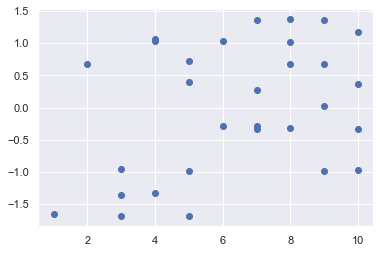

In [15]:
plt.scatter(data['Satisfaction'],data['Loyalty'])

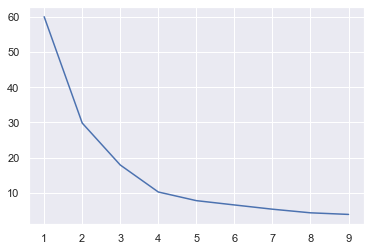

In [25]:
x = data.copy()

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(1, 10)
plt.plot(number_clusters, wcss)

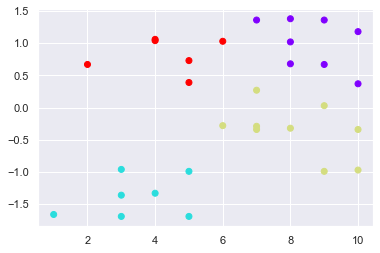

In [32]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)

clusters = data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x_scaled)

plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')